In [1]:
import numpy as np
import matplotlib.pyplot as pt
import scipy as ci
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings
import numpy.linalg as la
warnings.filterwarnings('ignore')
%matplotlib inline

<font size=5>Problem 1<font>

In [ ]:
## Exercise 1

In [45]:
## producing random numbers with selections and store in histograms
import week09_histogramObject as hb
histo1 = hb.histo("random<1/3 with 30 randoms", 35,0., 35.) 
histo1.hsetlabels("random<1/3 with 30 randoms","N")
histo2 = hb.histo("random<1/3 with 300 randoms", 120, 40., 160.) 
histo2.hsetlabels("random<1/3 with 300 randoms","N")
histo3 = hb.histo("random<1/3 with 3000 randoms", 450, 800, 1250) 
histo3.hsetlabels("random<1/3 with 3000 randoms","N")
for i in range(0,10000):	
	tmp1=0
	tmp2=0
	tmp3=0
	for j in range(0,30):
		if np.random.rand(1)<1/3:
			tmp1=tmp1+1
	histo1.hfill(tmp1)
	for j in range(0,300):
		if np.random.rand(1)<1/3:
			tmp2=tmp2+1
	histo2.hfill(tmp2)
	for j in range(0,3000):
		if np.random.rand(1)<1/3:
			tmp3=tmp3+1
	histo3.hfill(tmp3)

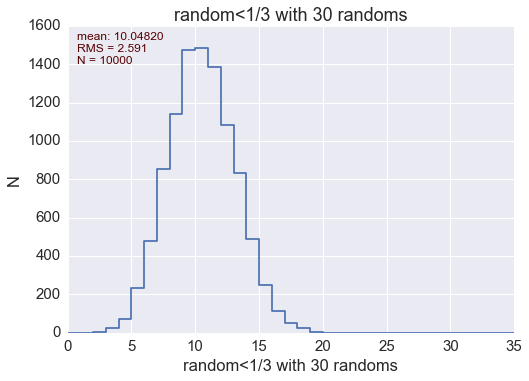

In [46]:
histo1.hprint()

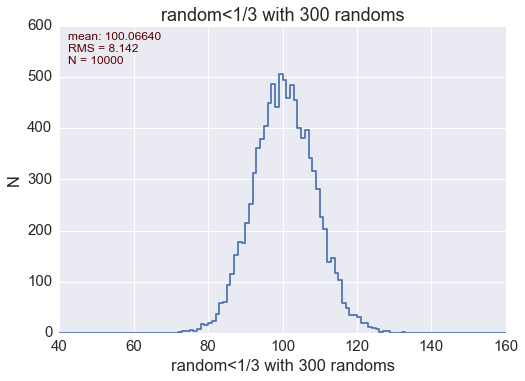

In [47]:
histo2.hprint()

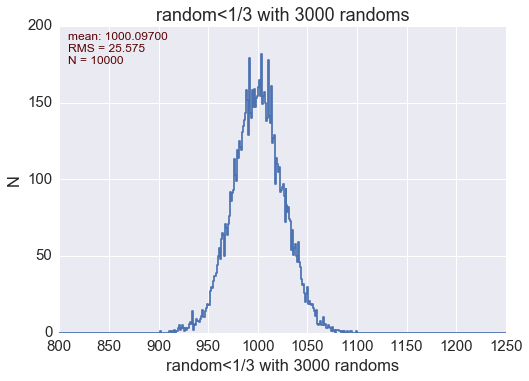

In [48]:
histo3.hprint()

In [ ]:
## Exercise 2

In [2]:
## Reading File
one_event_signal = np.array([0.] * 100)
all_the_data = np.array([one_event_signal] * 10000)
data_file = open("week12_in_class_exercise2_10000_events.dat", "rb") 
data = np.load(data_file)

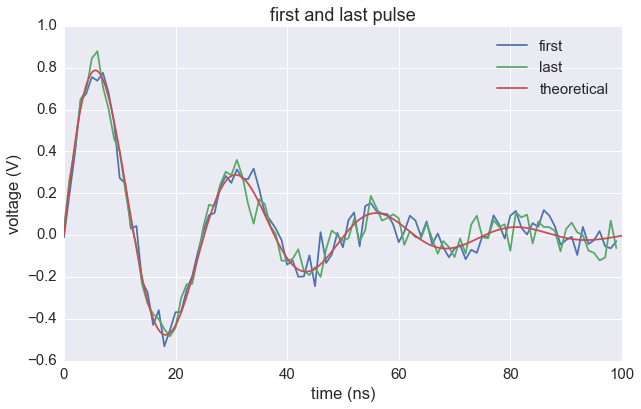

In [15]:
sns.set(font_scale=1.5)
pt.figure(figsize=(10,6))
pt.plot(data[0],label='first')
pt.plot(data[-1],label='last')
x=np.linspace(0,100,1000)
pt.plot(x,np.sin(0.25*x)*np.exp(-x/25),'-',label='theoretical')
pt.title('first and last pulse')
pt.xlabel('time (ns)')
pt.ylabel('voltage (V)')
pt.legend(loc='best')
pt.show()

<font size=5>Problem 2<font>

In [4]:
## V= A sin(w*t)*epx(-t/Tau)
# loop over data, amplitude, and bin and store each value
# every time. 
tau=25
w=0.25
sigma=0.05
t=np.arange(0,100,1)

def V(A,t): ## voltage
    return A*np.sin(w*t)*np.exp(-t/tau)

Amp=np.arange(0.90005,1.1,0.002)

best_chi_amp=[]
best_abso_amp=[]
best_qua_amp=[]
for i in range(0,10000): ## loop each data
    Chi_each=[]
    Abso_each=[]
    Qua_each=[]
    for j in Amp: ## loop amplitudes
        Chi_tmp=[]
        Abso_tmp=[]
        Qua_tmp=[]
        for k in range(0,100): ## loop each bin for different methods
            Chi_tmp.append(      (V(j,k)-data[i][k])**2/sigma**2  )
            Abso_tmp.append( abs((V(j,k)-data[i][k])/sigma**2)    )
            Qua_tmp.append(      (V(j,k)-data[i][k])**4/sigma**4  )
        Chi_each.append(sum(Chi_tmp))
        Abso_each.append(sum(Abso_tmp))
        Qua_each.append(sum(Qua_tmp))
    best_chi_amp.append(0.9+0.002*Chi_each.index(min(Chi_each)))
    best_abso_amp.append(0.9+0.002*Abso_each.index(min(Abso_each)))
    best_qua_amp.append(0.9+0.002*Qua_each.index(min(Qua_each)))

In [5]:
import week09_histogramObject as hb

histo1 = hb.histo("chi", 100,0.90, 1.1) 
histo1.hsetlabels("best fit amp using chisq test","N")
histo2 = hb.histo("abs", 100,0.9, 1.1) 
histo2.hsetlabels("best fit amp using abs test","N")
histo3 = hb.histo("quartic", 100,0.9, 1.1) 
histo3.hsetlabels("best fit amp using quartic test","N")

for i in range(0,len(best_qua_amp)):
    histo1.hfill(best_chi_amp[i])
    histo2.hfill(best_abso_amp[i])
    histo3.hfill(best_qua_amp[i])

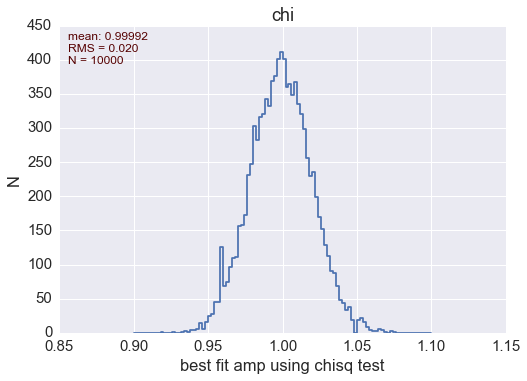

In [6]:
histo1.hprint()

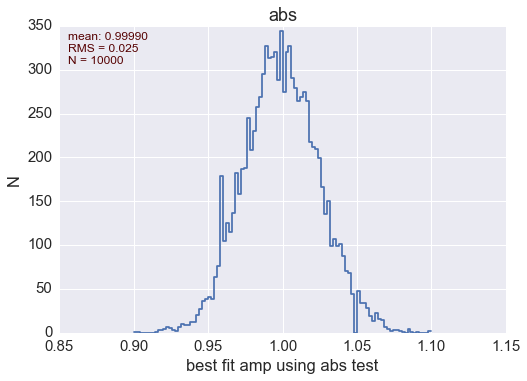

In [7]:
histo2.hprint()

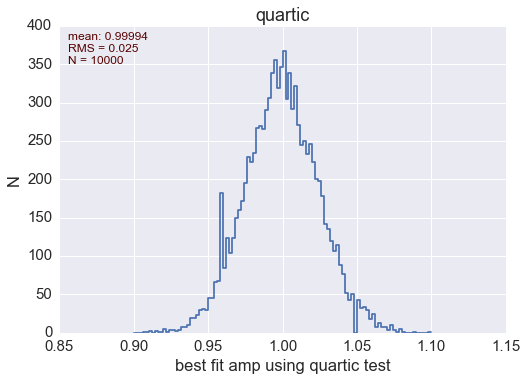

In [8]:
histo3.hprint()

<font size=4>
Time Taken: Problem 1: 30 mins. Problem 2: 1 hr. Collaboration: Completed on my own. Reference: None.